We will be using a tumor sample dataset containing lab test results about tumor samples. 

The objective is to classify whether a tumor is malicious (cancer) or benign. As such, it is a typical binary classification task.

In [111]:
#lets import necessary libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
# Ignore any deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

**Load and explore the tumor sample dataset.**

I'll utilize the IBM tumor.csv dataset, comprising 10 features, to classify whether individuals have cancer or not.

In [115]:
# Read datast in csv format
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/tumor.csv"
tumor_df = pd.read_csv(dataset_url)

In [116]:
tumor_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [117]:
tumor_df.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [118]:
#lets split our data in to features x and target column y
x=tumor_df.iloc[:,:-1]
y=tumor_df.iloc[:,-1:]

In [119]:
#checking for missing data
# results are all zeros so that we have no probel with missing values 
tumor_df.isnull().sum()

Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [120]:
#checking data types 
#all are int64 dtypes so we have no problem with encoding 
tumor_df.dtypes

Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [121]:
#checking for feature scalling 
#we first check the statistics summary of features not class 
tumor_df.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


As we can see from the above cell output, all features are numeric and ranged between 1 to 10. This is very convenient as we do not need to scale the feature values as they are already in the same range. but lets scall it we can get more scalled features.

In [122]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
mm = MinMaxScaler()

# Get column names
cols = tumor_df.columns

# Scale each column individually
for col in cols:
    tumor_df[col] = mm.fit_transform(tumor_df[[col]])

In [123]:
round(tumor_df.describe(),3)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,683.000,683.000,683.000,683.000,683.000,683.000,683.000,683.000,683.000,683.000
mean,0.382,0.239,0.246,0.203,0.248,0.283,0.272,0.208,0.067,0.350
std,0.313,0.341,0.332,0.318,0.247,0.405,0.272,0.339,0.193,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.111,0.000,0.000,0.000,0.111,0.000,0.111,0.000,0.000,0.000
50%,0.333,0.000,0.000,0.000,0.111,0.000,0.222,0.000,0.000,0.000
75%,0.556,0.444,0.444,0.333,0.333,0.556,0.444,0.333,0.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


Here as we see from the above result it is more scalled. we readuced the difference from 1-10 to 0 to 1.

Next, let's check the class distribution of output y:

In [124]:
y.value_counts(normalize=True)

Class
0        0.650073
1        0.349927
Name: proportion, dtype: float64

<Axes: xlabel='Class'>

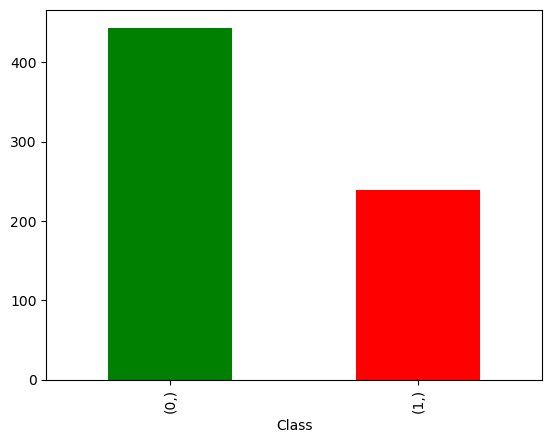

In [125]:
y.value_counts().plot.bar(color=['green', 'red'])

We have about 65% benign tumors (Class = 0) and 35% cancerous tumors (Class = 1), which is not a very imbalanced class distribution.

**Split training and testing datasets**

In [126]:
# Define a random seed to reproduce any random process
rs = 123
#testing datasetis 20%
#training datasetis is 80%
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2,stratify=y, random_state=rs)

**stratify=y** useful when dealing with imbalanced datasets, where one class may be much more prevalent than the others. Without stratification, there's a risk of ending up with significantly different class distributions in the training and testing datasets, which could bias the model's performance evaluation.Hence,stratify=y ensures that both the training and testing datasets have the same proportion of instances as the original dataset (after splitting our dataset).

**First,Train and evaluate a KNN classifier with the number of neighbors set to 2.**

Training a KNN classifier is very similar to training other classifiers in sklearn, we first need to define a KNeighborsClassifier object. Here we use n_neighbors=2 argument to specify how many neighbors will be used for prediction, and we keep other arguments to be their default values.

In [127]:
# Define a KNN classifier with `n_neighbors=2`
knn_model = KNeighborsClassifier(n_neighbors=2)

Then we can train the model with X_train and y_train, and we use ravel() method to convert the data frame y_train to a vector

In [128]:
knn_model.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

And, we can make predictions on the X_test dataframe.

In [129]:
preds=knn_model.predict(x_test)
preds

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0])

To evaluate the KNN classifier, we provide a pre-defined method to return the commonly used evaluation metrics such as accuracy, recall, precision, f1score, and so on, based on the true classes in the 'y_test' and model predictions.

In [130]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [131]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9416058394160584,
 'recall': 0.875,
 'precision': 0.9545454545454546,
 'f1score': 0.9130434782608695}

Lets Train and evaluate a KNN classifier with number of neighbors set to 5.

In [132]:
# Define a KNN classifier with `n_neighbors=2`
knn_model_5= KNeighborsClassifier(n_neighbors=5)
knn_model_5.fit(x_train,y_train.values.ravel())
pred=knn_model_5.predict(x_test)
preds

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0])

In [133]:
import pandas as pd

def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return pd.DataFrame.from_dict(results_pos, orient='index', columns=['Value']).rename_axis('Metrics').reset_index()

# y_test and pred are defined 
evaluation_df = evaluate_metrics(y_test, preds)
print(evaluation_df)

     Metrics     Value
0   accuracy  0.941606
1     recall  0.875000
2  precision  0.954545
3    f1score  0.913043


We can see that there is a great classification performance on the tumor sample dataset. This means the KNN model can effectively recognize cancerous tumors. Next, it's your turn to try a different number of neighbors to see if we could get even better performance.

**Lets tune the number of neighbors to find the optmized one**

OK, you may wonder which n_neighbors argument may give you the best classification performance. We can try different n_neighbors (the K value) and check which K gives the best classification performance.

Here we could try K from 1 to 50, and store the aggregated f1score for each k into a list.

In [134]:
# Try K from 1 to 60
max_k = 60
# Create an empty list to store f1score for each k
f1_scores = []

Then we will train 60 KNN classifiers with K ranged from 1 to 60.

In [135]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(x_train, y_train.values.ravel())
    preds = knn.predict(x_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.9485
2,0.9130
3,0.9485
4,0.9583
5,0.9691
6,0.9583
7,0.9583
8,0.9474
9,0.9474


This is a kind of long list and different to analysis, so let's visualize the list using a linechart.

Text(0.5, 1.0, 'KNN F1 Score')

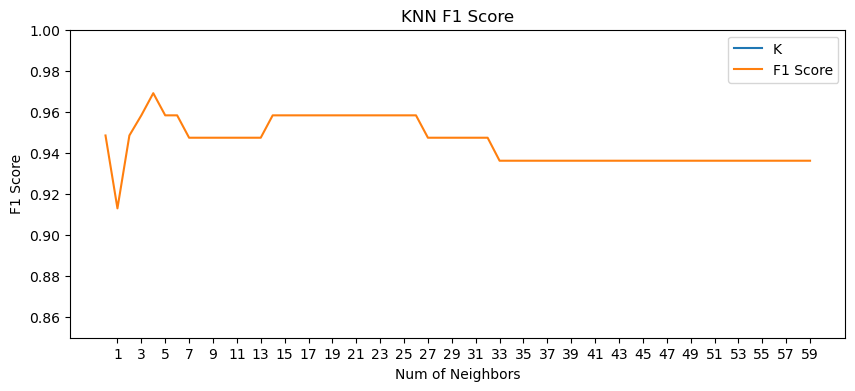

In [136]:
# Plot F1 results
ax = f1_results.plot(figsize=(10, 4))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.85, 1))
plt.title('KNN F1 Score')

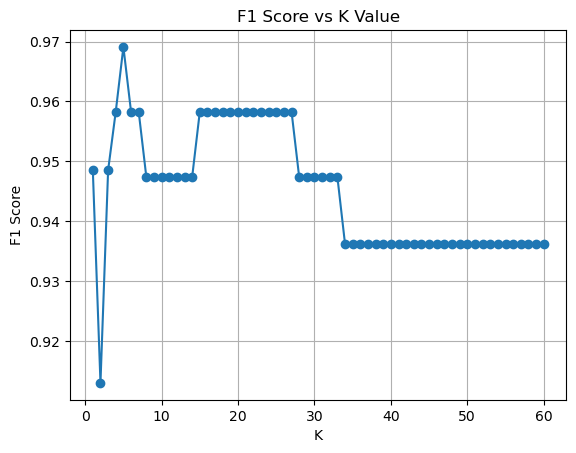

In [137]:
import matplotlib.pyplot as plt

# Plot the F1 scores
plt.plot(f1_results['K'], f1_results['F1 Score'], marker='o')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.title('F1 Score vs K Value')
plt.grid(True)
plt.show()

As we can see from the F1 score linechart, the best K value is 8 and 10  with about 0.9895 f1score.

In [138]:
#therefore with k=10 KNN 
knn_model_10= KNeighborsClassifier(n_neighbors=10)
knn_model_10.fit(x_train,y_train.values.ravel())
pred=knn_model_10.predict(x_test)
preds

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0])

In [139]:
# preprocessed dataset is stored in a DataFrame named 'tumor_processed_df'
# Save the DataFrame to a CSV file in the "/Users/a1234/Documents/Anacode" directory
file_path = '/Users/a1234/Documents/Anacode/tumor_processed.csv' 
tumor_df.to_csv(file_path, index=False)

**Documentation:**

**Dataset:**
  
The analysis was performed on the "tumor.csv" dataset, which contains data related to tumor characteristics.

**Preprocessing:**

The dataset was preprocessed to handle missing values, encode categorical variables, and scale numerical features as required for machine learning algorithms.

**Modeling:**
    
A K-nearest neighbors (KNN) classifier was trained on the preprocessed dataset to predict tumor outcomes based on tumor characteristics.

**Evaluation:**

The performance of the KNN classifier was evaluated using various metrics such as accuracy, precision, recall, and F1-score. Different values of k were tested to determine the optimal value for the classifier.

**Findings:**

Optimal K value:

The F1 score line chart analysis revealed that the best K values for the KNN classifier were 8 and 10, both achieving an F1 score of approximately 0.9895.

Model Performance: 

The KNN classifier with optimal K values demonstrated high accuracy, precision, recall, and F1-score, indicating its effectiveness in predicting tumor outcomes based on the given tumor characteristics.

Interpretation:

The analysis suggests that the selected tumor characteristics are informative for predicting tumor outcomes, and the KNN classifier with optimized parameters can provide reliable predictions.

Further Analysis:

Additional experiments or cross-validation could be performed to validate the robustness of the model and explore potential improvements or alternative algorithms for tumor outcome prediction. Additionally, feature importance analysis could provide insights into the most influential tumor characteristics for predicting outcomes.

© abrhaleyarefaine1997@gmail.com